# ML Assignmnt 04: Support Vector Machine

Juee S (PD_49) PRN: 1032222572

Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
Dataset includes 14 variables such as Age, Sex, Cholesterol, Max Heart Rate, Exercise Induced Angina, etc.

This is part 1 of this assignment. The part 2 is another notebook, and the readme describes the comparison between the performance.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [10]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [ ]:
df['target'] = pd.get_dummies(df['target'], drop_first=True)

In [12]:
df['target'].value_counts()

target
False    164
True     139
Name: count, dtype: int64

In [13]:
df['target'].nunique()

2

In [14]:
X = df.drop('target',axis=1)
y = df['target']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [17]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [21]:
y_pred = svm_model.predict(X_test)

In [22]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.6373626373626373
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.82      0.71        49
        True       0.67      0.43      0.52        42

    accuracy                           0.64        91
   macro avg       0.65      0.62      0.61        91
weighted avg       0.64      0.64      0.62        91



In [23]:
param_grid = {'C':[0.01,0.1,1.0,10,100,1000,10000,100000],
              'gamma':[1,0.1,0.01,0.001,0.0001,0.00001,0.000001]}

In [25]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.0s
[CV] END .................................C=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]},
             verbose=2)

In [26]:
grid_predictions = grid.predict(X_test)

In [29]:
print("Accuracy Score:", accuracy_score(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))

Accuracy Score: 0.8021978021978022
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.86      0.82        49
        True       0.82      0.74      0.78        42

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



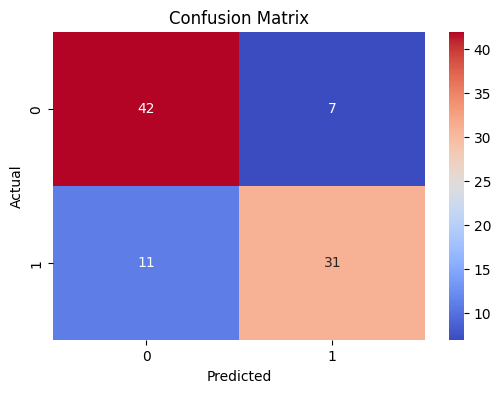

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()